In [1]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m , 3))
X[:, 0] = np.cos(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

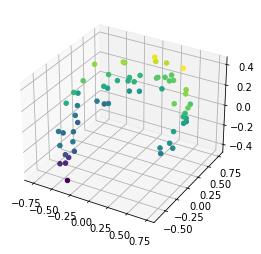

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# data = np.random.random(size=(3, 3, 3))
z, x, y = X[:, 2], X[:, 0], X[:, 1]
ax.scatter(x, y, z, c=z, alpha=1)
plt.show()

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c1, c2

(array([0.89211713, 0.39862327, 0.21266525]),
 array([-0.4430606 ,  0.86403047,  0.23905785]))

In [4]:
W2 = Vt.T[: ,2]
X2D = X_centered.dot(W2)
X2D

array([ 0.01469917, -0.15288012, -0.00589584,  0.03783253,  0.20037409,
        0.09777138,  0.16482709,  0.01618014,  0.19079199, -0.0389408 ,
       -0.02893881, -0.12454246,  0.02346814,  0.10854836, -0.06036203,
       -0.0494685 , -0.03411593, -0.04760106, -0.04801689, -0.12034441,
        0.11486649, -0.17544644, -0.09263336,  0.0354843 ,  0.09619992,
       -0.01228515, -0.04333151,  0.00341899, -0.03332506,  0.06614245,
       -0.06193873, -0.08448836, -0.06147292,  0.01388076,  0.11576042,
        0.13541656, -0.05553536, -0.1513483 , -0.14703688,  0.18691986,
       -0.05520566,  0.02704862,  0.17611983, -0.06656139, -0.0326239 ,
       -0.07375308, -0.11638274,  0.06897292,  0.08310968, -0.19161827,
        0.09752855, -0.0367621 ,  0.00427124,  0.01498741, -0.13931867,
       -0.03089611, -0.08693468,  0.16589237,  0.20619543, -0.00670318])

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D

array([[ 0.67087942,  0.56513104],
       [ 0.04480704, -0.41793944],
       [ 0.57664674,  0.5159658 ],
       [ 0.61043489, -0.29598205],
       [ 0.49669553, -0.2413613 ],
       [-0.71163356,  0.15954045],
       [ 0.68476499,  0.61284835],
       [-0.43440732,  0.75337617],
       [-0.69046954, -0.10366597],
       [-0.32880514, -0.37604192],
       [ 0.6356892 , -0.05097402],
       [-0.67909389,  0.27316609],
       [ 0.60734527,  0.26426751],
       [ 0.56060871,  0.52319996],
       [-0.66571147,  0.37337333],
       [ 0.28337373, -0.39554997],
       [-0.43221946,  0.77021109],
       [-0.41366387, -0.36498754],
       [-0.56162921,  0.71261307],
       [ 0.71386406,  0.5137601 ],
       [-0.33577708, -0.41434323],
       [ 0.68542133,  0.70028788],
       [ 0.61983207, -0.01932232],
       [ 0.72606385,  0.26390408],
       [-0.74627441,  0.37040908],
       [-0.53254926,  0.67845311],
       [ 0.16820779, -0.47236772],
       [-0.69288545,  0.31738031],
       [ 0.62719866,

In [6]:
pca.components_

array([[-0.89211713, -0.39862327, -0.21266525],
       [ 0.4430606 , -0.86403047, -0.23905785]])

In [7]:
pca.explained_variance_ratio_

array([0.59889419, 0.37921966])

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [12]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [13]:
pca.n_components_, np.sum(pca.explained_variance_ratio_)

(154, 0.9503684424557436)

In [14]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [15]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

In [16]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

In [21]:
# filename = "my_mnist.data"
# m, n = X_train.shape
# X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
# X_mm[:] = X_train

In [22]:

# batch_size = m // n_batches
# inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
# inc_pca.fit(X_mm)

In [5]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [6]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [7]:
import numpy as np
np.linspace(0.03, 0.05, 10)

array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ])

In [11]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", 
                    gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

32.78630879576614

In [13]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

In [14]:
X_reduced

array([[ 0.01083235,  0.04071677],
       [-0.05152666, -0.04026957],
       [-0.02359587, -0.01476027],
       ...,
       [ 0.03496771,  0.01794121],
       [-0.05313431, -0.02821214],
       [ 0.00435367,  0.04422481]])